In [5]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from trial_class import *
from experiment_class import Experiment

import numpy as np
import pandas as pd
import tdt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from scipy.signal import butter, filtfilt
from sklearn.linear_model import LinearRegression
from sp_extension import *

In [6]:
experiment_path = r"/Users/naylajimenez/Downloads/papers/dopamine/cohort-1-2/allcohorts/C1_2_3_Social_Pref/all"
csv_base_path = r"/Users/naylajimenez/Downloads/papers/dopamine/cohort-1-2/allcohorts/C1_2_3_Social_Pref/all_csvs"
brain_region = '#15616F'

# NAc: #15616F
# mPFC: #FFAF00

In [7]:
# groups csv + experiment data into one variable
experiment = Experiment(experiment_path, csv_base_path)

# batch process the data, removing the specified time segments for subjects
experiment.default_batch_process()

Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort-1-2/allcohorts/C1_2_3_Social_Pref/all/p5-240826-091418/Notes.txt
read from t=0s to t=790.95s
Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort-1-2/allcohorts/C1_2_3_Social_Pref/all/nn2-250117-085631/Notes.txt
read from t=0s to t=814.05s
Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort-1-2/allcohorts/C1_2_3_Social_Pref/all/p2-240523-081105/Notes.txt
read from t=0s to t=788.65s
Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort-1-2/allcohorts/C1_2_3_Social_Pref/all/nn4-250118-094351/Notes.txt
read from t=0s to t=795.95s
Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort-1-2/allcohorts/C1_2_3_Social_Pref/all/n6-240826-094701/Notes.txt
read from t=0s to t=800.05s
Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort-1-2/allcohorts/C1_2_3_Social_Pref/all/nn1-250117-081652/Notes.txt

In [8]:
bout_definitions = [
    {
        'prefix': 'Subject',
        'introduced': 'Subject Introduced',
        'removed': 'Subject Removed'
    },
    {
        'prefix': 'Mouse',
        'introduced': 'Mouse In',
        'removed': 'Mouse Out'
    }
]

experiment.group_extract_manual_annotations(bout_definitions,first_only=False)

Processing behaviors for p5-240826-091418...
Processing behaviors for nn2-250117-085631...
Processing behaviors for p2-240523-081105...
Processing behaviors for nn4-250118-094351...
Processing behaviors for n6-240826-094701...
Processing behaviors for nn1-250117-081652...
Processing behaviors for pp7-250118-075659...
Processing behaviors for pp3-250118-064713...
Processing behaviors for p8-240827-075823...
Processing behaviors for nn8-250118-105443...
Processing behaviors for p1-240522-080200...
Processing behaviors for n5-240826-083822...
Processing behaviors for p6-240827-065303...
Processing behaviors for pp5-250117-121543...
Processing behaviors for pp4-250118-072201...
Processing behaviors for nn7-250118-101917...
Processing behaviors for pp8-250118-083250...
Processing behaviors for nn6-250117-101903...
Processing behaviors for p7-240826-102402...
Processing behaviors for pp6-250117-124823...
Processing behaviors for n7-240827-072608...
Processing behaviors for p3-240522-092431..

## Long-Term Bar Graph - Total Investigation Time


Finished processing CSVs.
Fixed trials: 26
Skipped trials: 0

Total trials: 26
Valid trials with matched behavior: 26
Skipped (empty): 0, Skipped (no match): 0, Skipped (no behavior data): 0

Pref Subjects (4): ['p5-240826-091418', 'pp3-250118-064713', 'n5-240826-083822', 'p7-240826-102402']
No_Pref Subjects (22): ['nn2-250117-085631', 'p2-240523-081105', 'nn4-250118-094351', 'n6-240826-094701', 'nn1-250117-081652', 'pp7-250118-075659', 'p8-240827-075823', 'nn8-250118-105443', 'p1-240522-080200', 'p6-240827-065303', 'pp5-250117-121543', 'pp4-250118-072201', 'nn7-250118-101917', 'pp8-250118-083250', 'nn6-250117-101903', 'pp6-250117-124823', 'n7-240827-072608', 'p3-240522-092431', 'nn3-250118-090940', 'nn5-250117-093631', 'pp1-250117-110456', 'pp2-250117-113909']


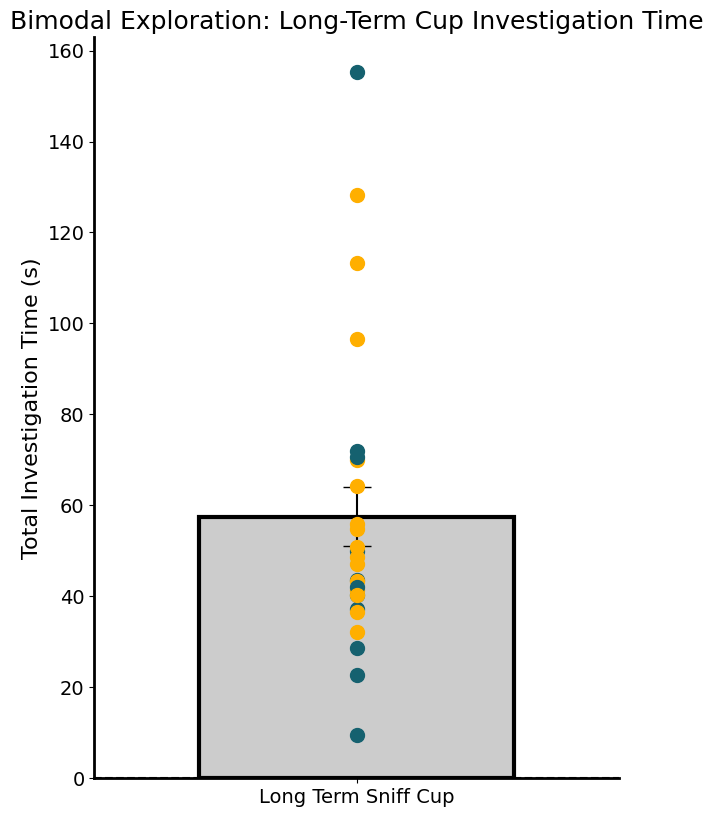

Subjects Pref: ['p5-240826-091418', 'pp3-250118-064713', 'n5-240826-083822', 'p7-240826-102402']
Subjects No_Pref: ['nn2-250117-085631', 'p2-240523-081105', 'nn4-250118-094351', 'n6-240826-094701', 'nn1-250117-081652', 'pp7-250118-075659', 'p8-240827-075823', 'nn8-250118-105443', 'p1-240522-080200', 'p6-240827-065303', 'pp5-250117-121543', 'pp4-250118-072201', 'nn7-250118-101917', 'pp8-250118-083250', 'nn6-250117-101903', 'pp6-250117-124823', 'n7-240827-072608', 'p3-240522-092431', 'nn3-250118-090940', 'nn5-250117-093631', 'pp1-250117-110456', 'pp2-250117-113909']


In [9]:
cups = "/Users/naylajimenez/Downloads/papers/dopamine/cohort-1-2/allcohorts/Cup_Assignments.csv"

# Run this before plotting
fix_behavior_data_for_experiment(experiment, csv_base_path)

# Now all experiment.trials[...].behaviors are valid — plot will work!
df_with_pref, pref_list, no_pref_list = plot_custom_sniff_cup_assignments(
    experiment=experiment,
    assignment_csv_path=cups,  # Replace with actual path
    bar_color='#cccccc',
    figsize=(6, 8),
    pad_inches=0.1,
    title="Bimodal Exploration: Long-Term Cup Investigation Time",
    save=False,
    save_name="LongTerm_BarGraph.png"
)

# View results
print("Subjects Pref:", pref_list)
print("Subjects No_Pref:", no_pref_list)

### With colors


Total trials: 26
Valid trials with matched behavior: 26
Skipped (empty): 0, Skipped (no match): 0, Skipped (no behavior data): 0
Number of mice (data points) plotted: 26


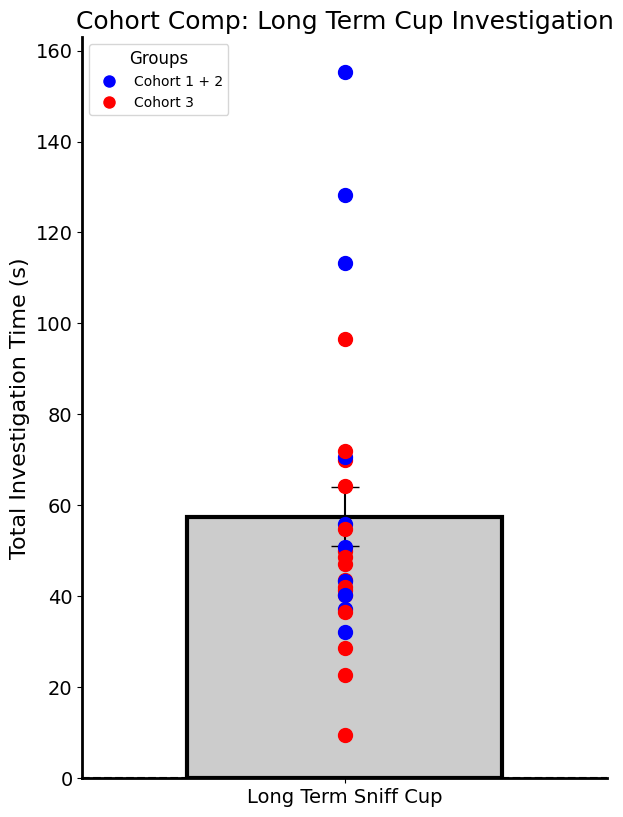

In [10]:
plot_grouped_sniff_cup_assignments(
    experiment=experiment,
    assignment_csv_path=cups,
    bar_color='#cccccc',
    color_nn_pp='red',
    color_n_p='blue',
    figsize=(6, 8),
    title="Cohort Comp: Long Term Cup Investigation",
    pad_inches=0.1,
    save=False,
    save_name="CohortComp_LT_IT.png"
)

## Bimodal Behavior

In [11]:
import pandas as pd

def create_metadata_dataframe_with_agent_mapping_new(trial_data_with_ids, sniff_cup_csv_path):
    """
    Computes total time and average bout duration per subject × agent type,
    using mapping from sniff cup to agent. Preserves full trial IDs.
    
    Parameters:
    - trial_data_with_ids: List of (full_trial_id, DataFrame) tuples.
    - sniff_cup_csv_path: Path to CSV with sniff cup → agent mappings.

    Returns:
    - DataFrame with rows = full trial IDs, columns = metrics per agent type.
    """
    import pandas as pd

    # Load sniff cup assignment CSV
    assign_df = pd.read_csv(sniff_cup_csv_path)
    assign_df['Subject'] = assign_df['Subject'].str.lower()

    all_records = []

    for full_trial_id, df in trial_data_with_ids:
        subject_id = full_trial_id.lower()

        # Match full trial ID directly
        mapping_row = assign_df[assign_df['Subject'] == subject_id]
        if mapping_row.empty:
            print(f"⚠️ No mapping found for subject '{subject_id}'. Skipping trial '{full_trial_id}'.")
            continue

        # Build sniff cup → agent type mapping
        cup_to_agent = {}
        for col in assign_df.columns:
            if 'sniff cup' in col.lower():
                cup_val = str(mapping_row.iloc[0][col]).strip().lower()
                cup_to_agent[col.lower()] = cup_val

        df = df.copy()
        df['Behavior'] = df['Behavior'].astype(str).str.lower()
        df['Agent Type'] = df['Behavior'].map(cup_to_agent)
        df = df[df['Agent Type'].notnull()]

        if df.empty:
            print(f"⚠️ No valid sniff cup behaviors after mapping for '{full_trial_id}'.")
            continue

        grouped = df.groupby('Agent Type')['Duration (s)'].agg(
            Total='sum',
            Event_Count='count'
        ).reset_index()

        row_data = {'Subject': full_trial_id}  # ✅ Keep full trial ID
        for _, row in grouped.iterrows():
            agent = row['Agent Type']
            total = row['Total']
            count = row['Event_Count']
            avg = total / count if count > 0 else 0

            row_data[f'Total_{agent}'] = total
            row_data[f'Avg_{agent}'] = avg

        all_records.append(row_data)

    result_df = pd.DataFrame(all_records)

    if result_df.empty:
        print("⚠️ No valid metadata rows created. Double check mapping and behaviors.")
        return pd.DataFrame()

    result_df = result_df.set_index('Subject').fillna(0)
    return result_df

def get_trial_dataframes_with_ids(experiment):
    """
    Given an Experiment object, return a list of (full_trial_id, DataFrame) tuples,
    where each DataFrame corresponds to the .behaviors of each trial.
    The full_trial_id is used directly, e.g., 'p5-240826-091418'.
    """
    trial_dataframes = []

    for trial_id, trial in experiment.trials.items():
        full_trial_id = trial_id.lower()  # Use full lowercase ID for mapping
        df = trial.behaviors

        if df is not None and not df.empty:
            trial_dataframes.append((full_trial_id, df.copy()))
        else:
            print(f"Skipping {trial_id}: no behavior data.")

    return trial_dataframes


In [12]:
# Correct data input
trial_data_with_ids = get_trial_dataframes_with_ids(experiment)

# Create metadata with mapping
metadata_df = create_metadata_dataframe_with_agent_mapping_new(trial_data_with_ids, sniff_cup_csv_path=cups)

metadata_df

,Total_long_term,Avg_long_term,Total_nothing,Avg_nothing,Total_novel,Avg_novel,Total_short_term,Avg_short_term
Subject,,,,,,,,
p5-240826-091418,128.300,5.578261,42.700,5.337500,48.500,4.041667,51.600,4.690909
nn2-250117-085631,40.400,2.376471,49.900,3.118750,81.199,4.059950,75.699,3.440864
p2-240523-081105,55.932,3.107333,98.998,5.823412,79.063,4.392389,54.731,2.880579
nn4-250118-094351,43.700,3.121429,60.900,2.537500,84.500,6.035714,36.900,3.075000
n6-240826-094701,37.300,3.108333,40.521,5.065125,40.900,3.146154,86.698,5.779867
nn1-250117-081652,9.600,9.600000,93.000,4.043478,55.998,5.090727,35.100,7.020000
pp7-250118-075659,41.300,2.581250,61.400,2.558333,104.899,3.496633,57.500,2.500000
pp3-250118-064713,96.600,3.864000,50.700,4.609091,27.300,5.460000,15.600,3.900000
p8-240827-075823,43.400,3.945455,88.899,5.229353,65.100,4.650000,71.400,5.100000


In [ ]:
def plot_investigation_by_agent(df,
                                 subjects_to_include=None,
                                 metric="Total",
                                 title='Investigation Time by Agent (Total)',
                                 ylabel='Investigation Time (s)',
                                 xlabel='Social Agent',
                                 custom_xtick_labels=['Empty', 'Short Term', 'Long Term', 'Novel'],
                                 custom_xtick_colors=['teal', 'blue', 'purple', 'orange'],
                                 ylim=None,
                                 bar_fill_color='white',
                                 bar_edge_color='black',
                                 bar_linewidth=3,
                                 bar_hatch='///',
                                 yticks_increment=None,
                                 figsize=(12, 7),
                                 pad_inches=0.1,
                                 save=False,
                                 save_name=None,
                                 legend_loc='upper right'):  # 🆕 New parameter
    """
    Aesthetic-matched plot: Investigation Time across agents.
    Styled to match `plot_y_across_bouts_ranks` exactly but keeps region legend and colored markers.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.lines import Line2D
    from scipy.stats import ttest_rel

    df = df.copy()

    if 'Subject' in df.columns:
        df['Subject'] = df['Subject'].astype(str).str.lower()
        df.set_index('Subject', inplace=True)
    else:
        df.index = df.index.astype(str).str.lower()

    if subjects_to_include:
        subjects_to_include = [s.lower() for s in subjects_to_include]
        df = df[df.index.isin(subjects_to_include)]

    agents = ['nothing', 'short_term', 'long_term', 'novel']
    columns_to_plot = [f"{metric}_{agent}" for agent in agents]
    missing_cols = [col for col in columns_to_plot if col not in df.columns]
    if missing_cols:
        print(f"⚠️ Missing columns: {missing_cols}")
        return

    df_plot = df[columns_to_plot].copy()
    df_plot.columns = agents

    if df_plot.empty or df_plot.isnull().all().all():
        print("⚠️ No valid data available to plot.")
        return

    # Paired t-tests
    def perform_t_tests(df_vals):
        from itertools import combinations
        results = {}
        for a1, a2 in combinations(df_vals.columns, 2):
            paired = df_vals[[a1, a2]].dropna()
            if len(paired) > 1:
                t_stat, p_val = ttest_rel(paired[a1], paired[a2])
                results[f"{a1} vs {a2}"] = p_val
        return results

    t_test_results = perform_t_tests(df_plot)

    # --- Mean & SEM ---
    mean_vals = df_plot.mean()
    sem_vals = df_plot.sem()

    fig, ax = plt.subplots(figsize=figsize)

    # --- Bar Plot ---
    ax.bar(df_plot.columns, mean_vals, yerr=sem_vals, capsize=6,
           color=bar_fill_color, edgecolor=bar_edge_color, linewidth=bar_linewidth,
           width=0.6, hatch=bar_hatch,
           error_kw=dict(elinewidth=2, capthick=2, zorder=5))

    # --- Lines + Colored Markers with black edge
    for subject_id, row in df_plot.iterrows():
        marker_color = '#15616F' if subject_id.startswith('n') else '#FFAF00' if subject_id.startswith('p') else 'gray'
        ax.plot(df_plot.columns, row.values, linestyle='-', color='gray', alpha=0.5, linewidth=2.5, zorder=1)
        ax.scatter(df_plot.columns, row.values, color=marker_color,
                   s=160, alpha=1.0, zorder=2, edgecolors='black', linewidth=2.5)

    # --- Labels ---
    ax.set_ylabel(ylabel, fontsize=30, labelpad=12)
    ax.set_xlabel(xlabel, fontsize=30, labelpad=12)
    ax.set_title(title, fontsize=16)

    # --- X-ticks ---
    ax.set_xticks(np.arange(len(df_plot.columns)))
    if custom_xtick_labels:
        ax.set_xticklabels(custom_xtick_labels, fontsize=28)
        if custom_xtick_colors:
            for tick, color in zip(ax.get_xticklabels(), custom_xtick_colors):
                tick.set_color(color)
    else:
        ax.set_xticklabels(df_plot.columns, fontsize=26)

    ax.tick_params(axis='y', labelsize=30)
    ax.tick_params(axis='x', labelsize=30)

    # --- Y-limits ---
    all_vals = np.concatenate([df_plot.values.flatten(), mean_vals.values])
    if ylim is None:
        min_val = np.nanmin(all_vals)
        max_val = np.nanmax(all_vals)
        lower_ylim = 0 if min_val > 0 else min_val * 1.1
        upper_ylim = max_val * 1.1
        ax.set_ylim(lower_ylim, upper_ylim)
        if lower_ylim < 0:
            ax.axhline(0, color='black', linestyle='--', linewidth=2, zorder=1)
    else:
        ax.set_ylim(ylim)
        if ylim[0] < 0:
            ax.axhline(0, color='black', linestyle='--', linewidth=2, zorder=1)

    if yticks_increment:
        y_min, y_max = ax.get_ylim()
        y_ticks = np.arange(np.floor(y_min), np.ceil(y_max) + yticks_increment, yticks_increment)
        ax.set_yticks(y_ticks)

    # Spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(5)
    ax.spines['bottom'].set_linewidth(5)

    # --- Legend ---
    legend_elements = [
        Line2D([0], [0], marker='o', color='none', label='NAc',
               markerfacecolor='#15616F', markeredgecolor='black', markersize=12, markeredgewidth=2),
        Line2D([0], [0], marker='o', color='none', label='mPFC',
               markerfacecolor='#FFAF00', markeredgecolor='black', markersize=12, markeredgewidth=2)
    ]
    ax.legend(handles=legend_elements, title="Region", fontsize=20, title_fontsize=22,
              loc=legend_loc, frameon=True)

    plt.tight_layout(pad=pad_inches)
    if save:
        if save_name is None:
            raise ValueError("save_name must be provided if save is True.")
        plt.savefig(save_name, transparent=True, bbox_inches='tight', pad_inches=pad_inches)

    plt.show()

    # --- Print t-test results ---
    print("\nPaired t-test results (across agents):")
    for comparison, p in t_test_results.items():
        if p < 0.001:
            stars = "***"
        elif p < 0.01:
            stars = "**"
        elif p < 0.05:
            stars = "*"
        else:
            stars = "ns"
        print(f"{comparison}: p = {p:.4f} ({stars})")



In [ ]:
# Trim pref_list to match the Subject index
trimmed_pref_list = [s.split('-')[0].lower() for s in no_pref_list]

plot_investigation_by_agent(
    df=metadata_df,                     # Your metadata dataframe
    subjects_to_include=trimmed_pref_list,     # List of Pref subject IDs (full trial names, e.g., 'p5-240826-091418')
    metric="Total",                    # Choose "Total" or "Avg"
    title=None,
    ylabel="Total Time (s)",
    xlabel="Agent",
    custom_xtick_labels=["Empty", "Short Term", "Long Term", "Novel"],
    custom_xtick_colors=["black", "blue", "purple", "orange"],          # Optional: match labels to colors
    ylim=(0, 160),                     # Set Y-axis limits if desired
    bar_fill_color='#D6C6F2',
    bar_edge_color='black',
    bar_linewidth=3,
    bar_hatch=None,
    yticks_increment=40,               # Optional: Y-tick step
    figsize=(14, 8),
    pad_inches=0.1,
    legend_loc='upper left',
    save=None,
    save_name="No_Pref_TIT.png"
)

plot_investigation_by_agent(
    df=metadata_df,                     # Your metadata dataframe
    subjects_to_include=trimmed_pref_list,     # List of Pref subject IDs (full trial names, e.g., 'p5-240826-091418')
    metric="Avg",                    # Choose "Total" or "Avg"
    title=None,
    ylabel="Average Duration (s)",
    xlabel="Agent",
    custom_xtick_labels=["Empty", "Short Term", "Long Term", "Novel"],
    custom_xtick_colors=["black", "blue", "purple", "orange"],          # Optional: match labels to colors
    ylim=(0, 10),                     # Set Y-axis limits if desired
    bar_fill_color='#D6C6F2',
    bar_edge_color='black',
    bar_linewidth=3,
    bar_hatch=None,
    yticks_increment=5,               # Optional: Y-tick step
    figsize=(14, 8),
    pad_inches=0.1,
    legend_loc='upper left',
    save=None,
    save_name="No_Pref_ABD.png"
)

# pref_list, no_pref_list

## Dopamine Stuff

### DA bar plots

In [13]:
experiment.group_extract_manual_annotations(bout_definitions,first_only=False)


Processing behaviors for p5-240826-091418...
Processing behaviors for nn2-250117-085631...
Processing behaviors for p2-240523-081105...
Processing behaviors for nn4-250118-094351...
Processing behaviors for n6-240826-094701...
Processing behaviors for nn1-250117-081652...
Processing behaviors for pp7-250118-075659...
Processing behaviors for pp3-250118-064713...
Processing behaviors for p8-240827-075823...
Processing behaviors for nn8-250118-105443...
Processing behaviors for p1-240522-080200...
Processing behaviors for n5-240826-083822...
Processing behaviors for p6-240827-065303...
Processing behaviors for pp5-250117-121543...
Processing behaviors for pp4-250118-072201...
Processing behaviors for nn7-250118-101917...
Processing behaviors for pp8-250118-083250...
Processing behaviors for nn6-250117-101903...
Processing behaviors for p7-240826-102402...
Processing behaviors for pp6-250117-124823...
Processing behaviors for n7-240827-072608...
Processing behaviors for p3-240522-092431..

In [14]:
for name, trial in experiment.trials.items():
    print(f"{name}: {len(trial.behaviors) if hasattr(trial, 'behaviors') else 'No behaviors'}")

p5-240826-091418: 52
nn2-250117-085631: 76
p2-240523-081105: 66
nn4-250118-094351: 64
n6-240826-094701: 49
nn1-250117-081652: 44
pp7-250118-075659: 80
pp3-250118-064713: 38
p8-240827-075823: 59
nn8-250118-105443: 46
p1-240522-080200: 68
n5-240826-083822: 52
p6-240827-065303: 41
pp5-250117-121543: 78
pp4-250118-072201: 62
nn7-250118-101917: 44
pp8-250118-083250: 59
nn6-250117-101903: 33
p7-240826-102402: 55
pp6-250117-124823: 59
n7-240827-072608: 55
p3-240522-092431: 72
nn3-250118-090940: 65
nn5-250117-093631: 52
pp1-250117-110456: 59
pp2-250117-113909: 60


In [15]:
def prep_combined_da_metrics(experiment, sniff_cup_csv_path, metric_list=None, first_only=False):
    import pandas as pd
    import re

    # Normalize behavior label spacing
    def normalize_behavior_label(label):
        return re.sub(r'\s+', ' ', label.strip().lower().replace('\u00a0', ' '))

    assign_df = pd.read_csv(sniff_cup_csv_path)
    assign_df['Subject'] = assign_df['Subject'].astype(str).str.lower()

    # Build subject -> behavior name -> agent identity mapping
    subject_to_behavior_to_agent = {}
    for _, row in assign_df.iterrows():
        subj = row['Subject']
        subject_to_behavior_to_agent[subj] = {}
        for col in row.index:
            col_norm = normalize_behavior_label(str(col))
            if col_norm.startswith("sniff cup"):
                agent_label = normalize_behavior_label(str(row[col]))
                subject_to_behavior_to_agent[subj][col_norm] = agent_label

    all_rows = []

    for trial_name, trial in experiment.trials.items():
        if not hasattr(trial, 'behaviors') or trial.behaviors.empty:
            continue

        df = trial.behaviors.copy()
        df['Behavior'] = df['Behavior'].astype(str).apply(normalize_behavior_label)

        subject_id = trial_name.lower()

        if subject_id not in subject_to_behavior_to_agent:
            continue

        mapping = subject_to_behavior_to_agent[subject_id]

        # Keep only sniff cup behaviors
        df = df[df["Behavior"].str.startswith("sniff cup")]

        # Map behaviors to agents
        df["Agent"] = df["Behavior"].apply(lambda b: mapping.get(b))
        df["Subject"] = subject_id
        df["Trial"] = trial_name

        unmatched = df[df["Agent"].isna()]
        if not unmatched.empty:
            print(f"‼️ Unmatched behaviors for subject '{subject_id}':")
            print("Behaviors that failed to map:", unmatched["Behavior"].unique())
            print("Available mapping keys:", list(mapping.keys()))

        df = df.dropna(subset=["Agent"])

        # Choose metrics
        known_cols = ["Behavior", "Agent", "Subject", "Trial"]
        if metric_list:
            metric_cols = [m for m in metric_list if m in df.columns]
        else:
            metric_cols = [c for c in df.columns if c not in known_cols and pd.api.types.is_numeric_dtype(df[c])]

        if not metric_cols:
            continue

        df = df[["Subject", "Agent"] + metric_cols]

        if first_only:
            df = df.groupby(["Subject", "Agent"], as_index=False).first()

        all_rows.append(df)

    if not all_rows:
        print("⚠️ No rows added to DataFrame. Check if behavior labels match and mapping keys are clean.")
        print(f"Subjects in experiment: {list(experiment.trials.keys())}")
        print(f"Subjects in assignments file: {assign_df['Subject'].tolist()}")
        print("Sample mapping dictionary:")
        for subj, mapping in subject_to_behavior_to_agent.items():
            print(f"{subj} -> {mapping}")
        return pd.DataFrame()

    combined_df = pd.concat(all_rows, ignore_index=True)

    # --- Aggregate by Subject-Agent pair ---
    if first_only:
        grouped = combined_df  # already one row per subject-agent
    else:
        grouped = combined_df.groupby(["Subject", "Agent"], as_index=False)[metric_cols].mean()

    # --- Ensure each subject has all 4 agent rows ---
    all_agents = ['nothing', 'short_term', 'long_term', 'novel']
    all_subjects = sorted(grouped['Subject'].unique())
    full_index = pd.MultiIndex.from_product([all_subjects, all_agents], names=['Subject', 'Agent'])

    final_df = (
        grouped.set_index(['Subject', 'Agent'])
               .reindex(full_index)
               .fillna(0)
               .reset_index()
    )

    print(f"✅ Final DA metrics DataFrame created with {len(final_df)} rows from {len(all_subjects)} subjects.")
    return final_df


In [16]:
def prep_combined_da_metrics(experiment, sniff_cup_csv_path, metric_list=None, first_only=False):
    import pandas as pd
    import re

    # Normalize behavior label spacing
    def normalize_behavior_label(label):
        return re.sub(r'\s+', ' ', label.strip().lower().replace('\u00a0', ' '))

    assign_df = pd.read_csv(sniff_cup_csv_path)
    assign_df['Subject'] = assign_df['Subject'].astype(str).str.lower()

    # Build subject -> behavior name -> agent identity mapping
    subject_to_behavior_to_agent = {}
    for _, row in assign_df.iterrows():
        subj = row['Subject']
        subject_to_behavior_to_agent[subj] = {}
        for col in row.index:
            col_norm = normalize_behavior_label(str(col))
            if col_norm.startswith("sniff cup"):
                agent_label = normalize_behavior_label(str(row[col]))
                subject_to_behavior_to_agent[subj][col_norm] = agent_label

    all_rows = []

    for trial_name, trial in experiment.trials.items():
        if not hasattr(trial, 'behaviors') or trial.behaviors.empty:
            continue

        df = trial.behaviors.copy()
        df['Behavior'] = df['Behavior'].astype(str).apply(normalize_behavior_label)

        subject_id = trial_name.lower()

        if subject_id not in subject_to_behavior_to_agent:
            continue

        mapping = subject_to_behavior_to_agent[subject_id]

        # Keep only sniff cup behaviors
        df = df[df["Behavior"].str.startswith("sniff cup")]

        # Map behaviors to agents
        df["Agent"] = df["Behavior"].apply(lambda b: mapping.get(b))
        df["Subject"] = subject_id
        df["Trial"] = trial_name

        unmatched = df[df["Agent"].isna()]
        if not unmatched.empty:
            print(f"‼️ Unmatched behaviors for subject '{subject_id}':")
            print("Behaviors that failed to map:", unmatched["Behavior"].unique())
            print("Available mapping keys:", list(mapping.keys()))

        df = df.dropna(subset=["Agent"])

        # Choose metrics
        known_cols = ["Behavior", "Agent", "Subject", "Trial"]
        if metric_list:
            metric_cols = [m for m in metric_list if m in df.columns]
        else:
            metric_cols = [c for c in df.columns if c not in known_cols and pd.api.types.is_numeric_dtype(df[c])]

        if not metric_cols:
            continue

        df = df[["Subject", "Agent"] + metric_cols]

        if first_only:
            df = df.groupby(["Subject", "Agent"], as_index=False).first()

        all_rows.append(df)

    if not all_rows:
        print("⚠️ No rows added to DataFrame. Check if behavior labels match and mapping keys are clean.")
        print(f"Subjects in experiment: {list(experiment.trials.keys())}")
        print(f"Subjects in assignments file: {assign_df['Subject'].tolist()}")
        print("Sample mapping dictionary:")
        for subj, mapping in subject_to_behavior_to_agent.items():
            print(f"{subj} -> {mapping}")
        return pd.DataFrame()

    combined_df = pd.concat(all_rows, ignore_index=True)

    # --- Aggregate by Subject-Agent pair ---
    if first_only:
        grouped = combined_df  # already one row per subject-agent
    else:
        grouped = combined_df.groupby(["Subject", "Agent"], as_index=False)[metric_cols].mean()

    # --- Ensure each subject has all 4 agent rows ---
    all_agents = ['nothing', 'short_term', 'long_term', 'novel']
    all_subjects = sorted(grouped['Subject'].unique())
    full_index = pd.MultiIndex.from_product([all_subjects, all_agents], names=['Subject', 'Agent'])

    final_df = (
        grouped.set_index(['Subject', 'Agent'])
               .reindex(full_index)
               .fillna(0)
               .reset_index()
    )

    print(f"✅ Final DA metrics DataFrame created with {len(final_df)} rows from {len(all_subjects)} subjects.")
    return final_df

In [17]:
# Proceed with DA metric computation after all files are processed
experiment.compute_all_da_metrics(use_max_length=False,
                                  max_bout_duration=5, #otal_avg_bout_duration
                                  use_adaptive=False, 
                                  allow_bout_extension=False,
                                  mode='standard')

Computing DA metrics for p5-240826-091418 ...
Computing DA metrics for nn2-250117-085631 ...
Computing DA metrics for p2-240523-081105 ...
Computing DA metrics for nn4-250118-094351 ...
Computing DA metrics for n6-240826-094701 ...
Computing DA metrics for nn1-250117-081652 ...
Computing DA metrics for pp7-250118-075659 ...
Computing DA metrics for pp3-250118-064713 ...
Computing DA metrics for p8-240827-075823 ...
Computing DA metrics for nn8-250118-105443 ...
Computing DA metrics for p1-240522-080200 ...
Computing DA metrics for n5-240826-083822 ...
Computing DA metrics for p6-240827-065303 ...
Computing DA metrics for pp5-250117-121543 ...
Computing DA metrics for pp4-250118-072201 ...
Computing DA metrics for nn7-250118-101917 ...
Computing DA metrics for pp8-250118-083250 ...
Computing DA metrics for nn6-250117-101903 ...
Computing DA metrics for p7-240826-102402 ...
Computing DA metrics for pp6-250117-124823 ...
Computing DA metrics for n7-240827-072608 ...
Computing DA metrics f

In [18]:
cups = '/Users/naylajimenez/Downloads/papers/dopamine/cohort-1-2/allcohorts/Cup_Assignments.csv'

# Build the combined dataframe, aggregating by mean across trials
combined_df = prep_combined_da_metrics(
    experiment=experiment,
    sniff_cup_csv_path=cups,
    metric_list=["Max Peak", "Mean Z-score", "AUC"],
    first_only=True
)

combined_df

✅ Final DA metrics DataFrame created with 104 rows from 26 subjects.


,Subject,Agent,Max Peak,Mean Z-score,AUC
0,n5-240826-083822,nothing,-0.387906,-2.321128,-7.891285
1,n5-240826-083822,short_term,5.216277,0.365220,3.395529
2,n5-240826-083822,long_term,8.733262,3.946496,25.255295
3,n5-240826-083822,novel,2.309291,0.347531,1.979775
4,n6-240826-094701,nothing,1.540612,1.291437,3.770928
...,...,...,...,...,...
99,pp7-250118-075659,novel,-0.616910,-2.665155,-16.522468
100,pp8-250118-083250,nothing,-0.852669,-0.996889,-0.597805
101,pp8-250118-083250,short_term,0.170662,-0.205383,-0.800776
102,pp8-250118-083250,long_term,-0.105432,-0.161812,-0.096865


In [19]:
print(pref_list)
nac_pref_list = ['n5-240826-083822']
mpfc_pref_list =['p5-240826-091418', 'pp3-250118-064713', 'p7-240826-102402', 'p4-240523-092600']

['p5-240826-091418', 'pp3-250118-064713', 'n5-240826-083822', 'p7-240826-102402']


In [20]:
print(no_pref_list)
nac_no_pref_list = ['nn2-250117-085631', 'nn4-250118-094351', 'n6-240826-094701', 'nn1-250117-081652', 'nn8-250118-105443', 'nn7-250118-101917', 'pp8-250118-083250', 'nn6-250117-101903', 'n7-240827-072608', 'nn3-250118-090940', 'nn5-250117-093631']
mpfc_no_pref_list =['p2-240523-081105','pp7-250118-075659', 'p8-240827-075823', 'p1-240522-080200', 'p6-240827-065303', 'pp5-250117-121543', 'pp4-250118-072201', 'pp6-250117-124823', 'p3-240522-092431','pp1-250117-110456', 'pp2-250117-113909']

['nn2-250117-085631', 'p2-240523-081105', 'nn4-250118-094351', 'n6-240826-094701', 'nn1-250117-081652', 'pp7-250118-075659', 'p8-240827-075823', 'nn8-250118-105443', 'p1-240522-080200', 'p6-240827-065303', 'pp5-250117-121543', 'pp4-250118-072201', 'nn7-250118-101917', 'pp8-250118-083250', 'nn6-250117-101903', 'pp6-250117-124823', 'n7-240827-072608', 'p3-240522-092431', 'nn3-250118-090940', 'nn5-250117-093631', 'pp1-250117-110456', 'pp2-250117-113909']


In [21]:
nac_list=['nn2-250117-085631', 'nn4-250118-094351', 'n6-240826-094701', 'nn1-250117-081652', 'nn8-250118-105443', 'nn7-250118-101917', 'pp8-250118-083250', 'nn6-250117-101903', 'n7-240827-072608', 'nn3-250118-090940', 'nn5-250117-093631', 'n5-240826-083822']
mpfc_list=['p5-240826-091418', 'pp3-250118-064713', 'p7-240826-102402', 'p4-240523-092600','p2-240523-081105','pp7-250118-075659', 'p8-240827-075823', 'p1-240522-080200', 'p6-240827-065303', 'pp5-250117-121543', 'pp4-250118-072201', 'pp6-250117-124823', 'p3-240522-092431','pp1-250117-110456', 'pp2-250117-113909']

In [22]:
def dopamine(precomputed_df, 
             metric_name="Mean Z-score", 
             title="Combined DA Metrics", 
             ylabel="DA Metric", 
             xlabel="Agent", 
             custom_xtick_labels=None, 
             custom_xtick_colors=None, 
             ylim=None, 
             bar_color="#00B7D7", 
             yticks_increment=None, 
             figsize=(14, 8), 
             pad_inches=0.1,
             save=False,
             save_name=None,
             subjects_to_include=None,
             highlight_subject=None):
    """
    Plots DA metrics across agents ("nothing", "short_term", "long_term", "novel")
    with subject-level spaghetti plots and paired t-tests.
    """

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from scipy.stats import ttest_rel

    fixed_order = ["nothing", "short_term", "long_term", "novel"]
    bar_positions = np.arange(len(fixed_order))

    def perform_all_pairwise_t_tests(pivot_df):
        results = {}
        bout_names = pivot_df.columns.tolist()
        for i in range(len(bout_names)):
            for j in range(i + 1, len(bout_names)):
                bout1, bout2 = bout_names[i], bout_names[j]
                paired_df = pivot_df[[bout1, bout2]].dropna()
                if len(paired_df) > 1:
                    t_stat, p_value = ttest_rel(paired_df[bout1], paired_df[bout2])
                    results[f"{bout1} vs {bout2}"] = {"t_stat": t_stat, "p_value": p_value}
        return results

    df = precomputed_df.copy()

    # --- Filter by Subject ---
    if subjects_to_include is not None:
        subjects_to_include = [s.lower() for s in subjects_to_include]
        df['Subject'] = df['Subject'].astype(str).str.lower()
        df = df[df['Subject'].isin(subjects_to_include)]

    if df.empty:
        print("⚠️ No data to plot after filtering.")
        return

    # --- Pivot by Subject x Agent ---
    try:
        pivot_df = df.pivot(index="Subject", columns="Agent", values=metric_name)
    except Exception as e:
        print("Error pivoting data:", e)
        return

    pivot_df = pivot_df.reindex(columns=fixed_order)

    # --- Summary Stats ---
    stats = pivot_df.agg(['mean', 'sem']).T.reset_index()
    stats.columns = ['Agent', 'mean', 'sem']
    stats = stats.set_index('Agent').reindex(fixed_order).reset_index()

    means = stats['mean'].values
    sems = stats['sem'].values

    # --- Paired T-tests ---
    t_test_results = perform_all_pairwise_t_tests(pivot_df)

    # --- Plot ---
    fig, ax = plt.subplots(figsize=figsize)

    # Bars
    ax.bar(
        bar_positions,
        means,
        yerr=sems,
        capsize=10,
        color=bar_color,
        edgecolor='black',
        linewidth=5,
        width=0.6
    )

    # Spaghetti lines (gray for all, black for highlight)
    for subject_id, row in pivot_df.iterrows():
        if highlight_subject and subject_id.lower() == highlight_subject.lower():
            ax.plot(bar_positions, row.values, linestyle='-', color='black', linewidth=4, zorder=3)
            ax.scatter(bar_positions, row.values, facecolors='black', edgecolors='black', 
                       s=160, linewidths=2, zorder=4)
        else:
            ax.plot(bar_positions, row.values, linestyle='-', color='gray', alpha=0.5, linewidth=2.5, zorder=1)
            ax.scatter(bar_positions, row.values, facecolors='none', edgecolors='gray', 
                       s=120, linewidths=3, zorder=2)

    # Labels
    ax.set_ylabel(ylabel, fontsize=35, labelpad=12)
    ax.set_xlabel(xlabel, fontsize=35, labelpad=12)
    if title:
        ax.set_title(title, fontsize=28)

    ax.set_xticks(bar_positions)
    xtick_labels = custom_xtick_labels if custom_xtick_labels else ["Empty", "Short Term", "Long Term", "Novel"]
    ax.set_xticklabels(xtick_labels, fontsize=35)
    if custom_xtick_colors:
        for tick, color in zip(ax.get_xticklabels(), custom_xtick_colors):
            tick.set_color(color)

    ax.tick_params(axis='y', labelsize=35)
    ax.tick_params(axis='x', labelsize=35)

    # Y-limits
    if ylim:
        ax.set_ylim(ylim)
    else:
        all_vals = np.concatenate([pivot_df.values.flatten(), means])
        ax.set_ylim(0, np.nanmax(all_vals) * 1.2)

    if yticks_increment:
        y_min, y_max = ax.get_ylim()
        ax.set_yticks(np.arange(np.floor(y_min), np.ceil(y_max) + yticks_increment, yticks_increment))

    ax.axhline(y=0, color='black', linestyle='--', linewidth=2)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(5)
    ax.spines['bottom'].set_linewidth(5)

    plt.tight_layout()
    if save:
        if save_name is None:
            raise ValueError("save_name must be provided if save is True.")
        plt.savefig(save_name, transparent=True, bbox_inches='tight', pad_inches=pad_inches)
    plt.show()

    # --- Print T-tests ---
    print(f"\nPlotted data from {pivot_df.shape[0]} subject(s).")
    if t_test_results:
        print("\nPaired t-test results (all agent comparisons):")
        for comp, stats in t_test_results.items():
            p = stats["p_value"]
            stars = "ns"
            if p < 0.001:
                stars = "***"
            elif p < 0.01:
                stars = "**"
            elif p < 0.05:
                stars = "*"
            print(f"{comp}: p = {p:.4f} ({stars})")




In [ ]:
labels=["Empty", "Short Term", "Long Term", "Novel"]
colors=["black", "blue", "purple", "orange"]

dopamine(
    precomputed_df=combined_df,
    metric_name="Max Peak",
    ylabel="Standard Peak ∆F/F",
    xlabel="Agent",
    custom_xtick_labels=labels,
    custom_xtick_colors=colors,
    bar_color="#FFAF00",
    ylim=(-2, 4),
    yticks_increment=2,
    figsize=(14, 8),
    save=True,
    save_name ="mpfc_pref_DA",
    title=None
)
dopamine(
    precomputed_df=combined_df,
    metric_name="Max Peak",
    ylabel="Standard Peak ∆F/F",
    xlabel="Agent",
    custom_xtick_labels=labels,
    custom_xtick_colors=colors,
    bar_color="#FFAF00",
    ylim=(-2, 4),
    yticks_increment=2,
    figsize=(14, 8),
    save=True,
    save_name ="mpfc_no_pref_DA",
    title=None
)

dopamine(
    precomputed_df=combined_df,
    metric_name="Max Peak",
    ylabel="Standard Peak ∆F/F",
    xlabel="Agent",
    custom_xtick_labels=labels,
    custom_xtick_colors=colors,
    bar_color="#15616F",
    ylim=(-2, 10),
    yticks_increment=2,
    figsize=(14, 8),
    save=True,
    save_name ="nac_pref_DA",
    title=None
)

dopamine(
    precomputed_df=combined_df,
    metric_name="Max Peak",
    ylabel="Standard Peak ∆F/F",
    xlabel="Agent",
    custom_xtick_labels=labels,
    custom_xtick_colors=colors,
    bar_color="#15616F",
    ylim=(-2, 10),
    yticks_increment=2,
    figsize=(14, 8),
    save=True,
    save_name ="nac_no_pref_DA",
    title=None
)

# NAc: #15616F
# mPFC: #FFAF00

## DA across subsequent bouts

In [23]:
# 1. Re-extract all behaviors and re-calculate DA metrics
experiment.reset_all_behaviors()
experiment.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only=False)

experiment.compute_all_da_metrics(
    use_max_length=False,
    max_bout_duration=4,
    use_adaptive=False,
    allow_bout_extension=False,
    mode='standard'
)

Processing behaviors for p5-240826-091418...
Processing behaviors for nn2-250117-085631...
Processing behaviors for p2-240523-081105...
Processing behaviors for nn4-250118-094351...
Processing behaviors for n6-240826-094701...
Processing behaviors for nn1-250117-081652...
Processing behaviors for pp7-250118-075659...
Processing behaviors for pp3-250118-064713...
Processing behaviors for p8-240827-075823...
Processing behaviors for nn8-250118-105443...
Processing behaviors for p1-240522-080200...
Processing behaviors for n5-240826-083822...
Processing behaviors for p6-240827-065303...
Processing behaviors for pp5-250117-121543...
Processing behaviors for pp4-250118-072201...
Processing behaviors for nn7-250118-101917...
Processing behaviors for pp8-250118-083250...
Processing behaviors for nn6-250117-101903...
Processing behaviors for p7-240826-102402...
Processing behaviors for pp6-250117-124823...
Processing behaviors for n7-240827-072608...
Processing behaviors for p3-240522-092431..

In [ ]:
import pandas as pd

def get_all_per_event_df(experiment, sniff_cup_csv_path, metric_list=None):
    import re

    def normalize_label(label):
        return re.sub(r'\s+', ' ', str(label).strip().lower().replace('\u00a0', ' '))

    # Load mapping from cup -> agent
    assign_df = pd.read_csv(sniff_cup_csv_path)
    assign_df['Subject'] = assign_df['Subject'].str.lower()
    
    subj_map = {}
    for _, row in assign_df.iterrows():
        subj = row['Subject']
        subj_map[subj] = {}
        for col in row.index:
            col_norm = normalize_label(col)
            if col_norm.startswith("sniff cup"):
                agent = normalize_label(row[col])
                subj_map[subj][col_norm] = agent

    all_rows = []
    for trial_name, trial in experiment.trials.items():
        if not hasattr(trial, 'behaviors') or trial.behaviors.empty:
            continue

        df = trial.behaviors.copy()
        df['Behavior'] = df['Behavior'].astype(str).apply(normalize_label)

        subject_id = trial_name.lower()
        if subject_id not in subj_map:
            continue

        df = df[df['Behavior'].str.startswith("sniff cup")]
        df['Agent'] = df['Behavior'].apply(lambda b: subj_map[subject_id].get(b))
        df['Subject'] = subject_id
        df['Trial'] = trial_name

        df = df.dropna(subset=["Agent"])
        
        known = ['Subject', 'Agent', 'Trial', 'Behavior', 'Event_Start']
        if metric_list:
            cols = [col for col in metric_list if col in df.columns]
        else:
            cols = [c for c in df.columns if c not in known and pd.api.types.is_numeric_dtype(df[c])]

        df = df[['Subject', 'Agent', 'Trial', 'Event_Start'] + cols]
        all_rows.append(df)

    final_df = pd.concat(all_rows, ignore_index=True)
    print(f"✅ Per-event DataFrame created with {len(final_df)} rows from {final_df['Subject'].nunique()} subjects.")
    return final_df

per_event_df = get_all_per_event_df(experiment, sniff_cup_csv_path=cups, metric_list=["Max Peak", "Mean Z-score", "AUC"])

In [ ]:
def plot_peak_by_agent_from_df(
    df,
    sniff_cup_csv_path=None,              # optional if Agent column is already present
    selected_agents=None,                # e.g. ['novel', 'short_term']
    n_subsequent_investigations=3,
    peak_col="Max Peak",
    metric_type='slope',
    figsize=(14, 8),
    line_order=None,
    custom_colors=None,
    custom_legend_labels=None,
    custom_xtick_labels=None,
    ylim=None,
    ytick_increment=None,
    xlabel="Investigation Index",
    ylabel="Avg Max Peak",
    subjects_to_include=None,            # ✅ MISSING COMMA FIXED HERE
    plot_title="Average Peak per Agent",
    save=False,
    save_name="agent_peak_plot.png"
):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.stats import linregress
    from scipy.optimize import curve_fit

    def exponential_decay(x, A, B, tau):
        return A + B * np.exp(-x / tau)

    def normalize_label(label):
        import re
        return re.sub(r'\s+', ' ', str(label).strip().lower().replace('\u00a0', ' '))

    def create_mapping(sniff_cup_csv_path):
        assign_df = pd.read_csv(sniff_cup_csv_path)
        assign_df['Subject'] = assign_df['Subject'].astype(str).str.lower()
        subject_to_behavior_to_agent = {}
        for _, row in assign_df.iterrows():
            subj = row['Subject']
            subject_to_behavior_to_agent[subj] = {}
            for col in row.index:
                col_norm = normalize_label(col)
                if col_norm.startswith("sniff cup"):
                    agent_label = normalize_label(row[col])
                    subject_to_behavior_to_agent[subj][col_norm] = agent_label
        return subject_to_behavior_to_agent

    df = df.copy()

    # --- Optional agent mapping ---
    if "Agent" not in df.columns:
        if sniff_cup_csv_path is None:
            raise ValueError("You must provide either an 'Agent' column or a sniff_cup_csv_path.")

        mapping = create_mapping(sniff_cup_csv_path)

        def get_agent(row):
            subj = str(row['Subject']).lower()
            bout = str(row['Bout']).lower()
            if '-' not in bout:
                return None
            cup_number = bout.split('-')[1]
            behavior = f"sniff cup {cup_number}"
            return mapping.get(subj, {}).get(behavior)

        df['Agent'] = df.apply(get_agent, axis=1)

    # --- Filter agents ---
    if selected_agents:
        df = df[df['Agent'].isin(selected_agents)]

    # --- Subject filtering ---
    if subjects_to_include:
        subjects_to_include = [s.lower() for s in subjects_to_include]
        df['Subject'] = df['Subject'].astype(str).str.lower()
        df = df[df['Subject'].isin(subjects_to_include)]

    # --- Investigation indexing ---
    df.sort_values(["Subject", "Agent", "Event_Start"], inplace=True)
    df["InvestigationIndex"] = df.groupby(["Subject", "Agent"]).cumcount() + 1
    df = df[df["InvestigationIndex"] <= n_subsequent_investigations]

    # --- Aggregate ---
    agg_df = (
        df.groupby(["Agent", "InvestigationIndex"], as_index=False)
        .agg(
            SubjectCount=("Subject", "nunique"),
            AvgPeak=(peak_col, "mean")
        )
    )

    # --- Plotting ---
    if custom_colors is None:
        custom_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

    fig, ax = plt.subplots(figsize=figsize)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_linewidth(5)
    ax.spines["bottom"].set_linewidth(5)
    ax.tick_params(axis="both", which="major", labelsize=48)
    ax.tick_params(axis="y", labelsize=35)

    metrics_dict = {}
    unique_agents = line_order if line_order else sorted(agg_df["Agent"].dropna().unique())

    for i, agent in enumerate(unique_agents):
        df_line = agg_df[agg_df["Agent"] == agent].copy()
        df_line.sort_values("InvestigationIndex", inplace=True)

        x_vals = df_line["InvestigationIndex"].values
        y_vals = df_line["AvgPeak"].values

        if len(x_vals) == 0 or len(y_vals) == 0:
            print(f"Skipping agent '{agent}' due to no data.")
            continue

        if metric_type.lower() == 'slope':
            slope, _, _, _, _ = linregress(x_vals, y_vals)
            metrics_dict[agent] = slope
            metric_label = f"slope: {slope:.3f}"
        elif metric_type.lower() == 'decay':
            try:
                p0 = (np.min(y_vals), np.max(y_vals)-np.min(y_vals), 1.0)
                popt, _ = curve_fit(exponential_decay, x_vals, y_vals, p0=p0)
                tau = popt[2]
                metrics_dict[agent] = tau
                metric_label = f"decay: {tau:.3f}"
            except RuntimeError:
                metrics_dict[agent] = np.nan
                metric_label = "decay: N/A"
        else:
            raise ValueError("metric_type must be 'slope' or 'decay'.")

        legend_label = custom_legend_labels[i] if custom_legend_labels and i < len(custom_legend_labels) else agent
        legend_label += f" ({metric_label}, n={df_line['SubjectCount'].max()})"

        color = custom_colors[i % len(custom_colors)]
        ax.plot(
            x_vals, y_vals,
            marker='o', linestyle='-',
            color=color,
            linewidth=5, markersize=30,
            label=legend_label
        )

    ax.set_xlabel(xlabel, fontsize=35, labelpad=12)
    ax.set_ylabel(ylabel, fontsize=35, labelpad=12)

    if ylim is not None:
        ax.set_ylim(ylim)
        if ytick_increment is not None:
            ticks = np.arange(ylim[0], ylim[1] + ytick_increment, ytick_increment)
            ax.set_yticks(ticks)
            ax.set_yticklabels([f"{t:.0f}" if t.is_integer() else f"{t:.1f}" for t in ticks], fontsize=35)

    if custom_xtick_labels:
        ax.set_xticks(np.arange(1, len(custom_xtick_labels) + 1))
        ax.set_xticklabels(custom_xtick_labels, fontsize=35)
    else:
        x_vals = sorted(agg_df["InvestigationIndex"].unique())
        ax.set_xticks(x_vals)
        ax.set_xticklabels([str(x) for x in x_vals], fontsize=35)

    if plot_title:
        ax.set_title(plot_title, fontsize=24)

    ax.legend(fontsize=26)
    plt.tight_layout()

    if save:
        plt.savefig(save_name, dpi=300, transparent=True, bbox_inches='tight')

    plt.show()

    print(f"\n=== Computed Metric ({metric_type.upper()}): ===")
    for agent, val in metrics_dict.items():
        print(f"Agent: {agent}, {metric_type} = {val:.3f}")

    return agg_df



In [ ]:
lines = ['nothing','short_term','long_term','novel']

plot_peak_by_agent_from_df(
    df=per_event_df,
    selected_agents=lines,
    peak_col="Max Peak",
    metric_type="slope",  # or "slope"
    custom_colors = ['black','#0045A6','#A839A4','#E06928'],
    custom_legend_labels=['Empty', 'Short Term', 'Long Term', 'Novel'],
    line_order=lines,
    n_subsequent_investigations=5,
    ylim=(-1, 4),
    ytick_increment=2,
    ylabel = 'Average Peak ΔF/F',
    subjects_to_include=mpfc_pref_list,
    plot_title=None,
    save=False,
    save_name=""
)

plot_peak_by_agent_from_df(
    df=per_event_df,
    selected_agents=lines,
    peak_col="Max Peak",
    metric_type="slope",  # or "slope"
    custom_colors = ['black','#0045A6','#A839A4','#E06928'],
    custom_legend_labels=['Empty', 'Short Term', 'Long Term', 'Novel'],
    line_order=lines,
    n_subsequent_investigations=5,
    ylim=(-1, 3),
    ytick_increment=1,
    ylabel = 'Average Peak ΔF/F',
    subjects_to_include=mpfc_no_pref_list,
    plot_title=None,
    save=False,
    save_name=""
)

plot_peak_by_agent_from_df(
    df=per_event_df,
    selected_agents=lines,
    peak_col="Max Peak",
    metric_type="slope",  # or "slope"
    custom_colors = ['black','#0045A6','#A839A4','#E06928'],
    custom_legend_labels=['Empty', 'Short Term', 'Long Term', 'Novel'],
    line_order=lines,
    n_subsequent_investigations=5,
    ylim=(-4, 10),
    ytick_increment=2,
    ylabel = 'Average Peak ΔF/F',
    subjects_to_include=nac_pref_list,
    plot_title=None,
    save=False,
    save_name=""
)

plot_peak_by_agent_from_df(
    df=per_event_df,
    selected_agents=lines,
    peak_col="Max Peak",
    metric_type="slope",  # or "slope"
    custom_colors = ['black','#0045A6','#A839A4','#E06928'],
    custom_legend_labels=['Empty', 'Short Term', 'Long Term', 'Novel'],
    line_order=lines,
    n_subsequent_investigations=5,
    ylim=(-0.5, 3.5),
    ytick_increment=1,
    ylabel = 'Average Peak ΔF/F',
    subjects_to_include=nac_no_pref_list,
    plot_title=None,
    save=False,
    save_name=""
)

## DA vs. % TIT

In [24]:
# 1. Re-extract all behaviors and re-calculate DA metrics
experiment.reset_all_behaviors()
experiment.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only=True)

Processing behaviors for p5-240826-091418...
Processing behaviors for nn2-250117-085631...
Processing behaviors for p2-240523-081105...
Processing behaviors for nn4-250118-094351...
Processing behaviors for n6-240826-094701...
Processing behaviors for nn1-250117-081652...
Processing behaviors for pp7-250118-075659...
Processing behaviors for pp3-250118-064713...
Processing behaviors for p8-240827-075823...
Processing behaviors for nn8-250118-105443...
Processing behaviors for p1-240522-080200...
Processing behaviors for n5-240826-083822...
Processing behaviors for p6-240827-065303...
Processing behaviors for pp5-250117-121543...
Processing behaviors for pp4-250118-072201...
Processing behaviors for nn7-250118-101917...
Processing behaviors for pp8-250118-083250...
Processing behaviors for nn6-250117-101903...
Processing behaviors for p7-240826-102402...
Processing behaviors for pp6-250117-124823...
Processing behaviors for n7-240827-072608...
Processing behaviors for p3-240522-092431..

In [25]:
def plot_da_vs_percent_investigation_time_by_agent(
    dopamine_df,
    metadata_df,
    agents_of_interest,
    agent_colors,
    agent_labels,
    da_metric='Max Peak',
    use_first_only=True,
    subjects_to_include=None,
    title="DA vs % Investigation Time",
    ylabel=None,
    figsize=(10, 7),
    ylim=None,
    yticks_increment=None,
    legend_loc='upper left',
    pad_inches=0.1,
    save=False,
    save_name=None
):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    from scipy.stats import linregress

    # --- Prep subject IDs ---
    if "Subject" not in metadata_df.columns:
        metadata_df = metadata_df.reset_index()
    metadata_df["Subject"] = metadata_df["Subject"].astype(str).str.lower()
    dopamine_df["Subject"] = dopamine_df["Subject"].astype(str).str.lower()

    if subjects_to_include:
        subjects_to_include = [s.lower() for s in subjects_to_include]
        metadata_df = metadata_df[metadata_df["Subject"].isin(subjects_to_include)]
        dopamine_df = dopamine_df[dopamine_df["Subject"].isin(subjects_to_include)]

    # --- Corrected: Calculate percent investigation time for selected agents ---
    percent_records = []

    # Get all agent names from metadata by parsing columns like "Total_novel"
    all_agent_names = [
        col.replace("Total_", "") for col in metadata_df.columns if col.startswith("Total_")
    ]

    for _, row in metadata_df.iterrows():
        subj = row["Subject"]

        # Total investigation time across all agents (not just selected ones)
        total_all = sum([
            row.get(f"Total_{agent}", 0)
            for agent in all_agent_names
        ])

        if total_all == 0:
            continue  # skip subject if no total investigation time at all

        for agent in agents_of_interest:
            agent_time = row.get(f"Total_{agent}", 0)
            percent = agent_time / total_all

            percent_records.append({
                "Subject": subj,
                "Agent": agent,
                "PercentTime": percent
            })

    percent_df = pd.DataFrame(percent_records)


    # --- Prepare DA values ---
    if use_first_only:
        dopamine_df = dopamine_df.groupby(["Subject", "Agent"], as_index=False).first()
    else:
        dopamine_df = dopamine_df.groupby(["Subject", "Agent"], as_index=False)[da_metric].mean()

    # --- Merge time + DA ---
    merged_df = pd.merge(dopamine_df, percent_df, on=["Subject", "Agent"], how="inner")

    if merged_df.empty:
        print("⚠️ No data to plot after merging.")
        return pd.DataFrame()

    # --- Plotting ---
    fig, ax = plt.subplots(figsize=figsize)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)

    all_x, all_y = [], []

    for agent in agents_of_interest:
        sub = merged_df[merged_df["Agent"] == agent]
        if sub.empty:
            continue

        x = sub["PercentTime"].values * 100
        y = sub[da_metric].values

        all_x.extend(x)
        all_y.extend(y)

        color = agent_colors.get(agent, 'gray')
        label = agent_labels.get(agent, agent)

        ax.scatter(x, y, color=color, s=250, alpha=1.0, edgecolor='black', linewidth=3, label=label, zorder=3)

    # --- Regression line ---
    stats_text_lines = ["r = ---", "p = ---", "n = ---"]
    if len(set(all_x)) > 1:  # ← Fix: only do regression if x-values aren't all identical
        slope, intercept, r_val, p_val, _ = linregress(all_x, all_y)
        x_fit = np.linspace(min(all_x), max(all_x), 100)
        y_fit = slope * x_fit + intercept
        ax.plot(x_fit, y_fit, color='black', linewidth=2.5, linestyle='-', zorder=2)

        stats_text_lines = [
            f"r = {r_val:.3f}",
            f"p = {p_val:.3f}",
            f"n = {len(all_x)} points"
        ]

    ax.set_xlabel("% Investigation Time", fontsize=24)
    ax.set_ylabel(ylabel if ylabel else da_metric, fontsize=24)
    ax.set_title(title, fontsize=26)
    ax.tick_params(axis='both', labelsize=24)

    if ylim:
        ax.set_ylim(ylim)
    if yticks_increment:
        y_min, y_max = ax.get_ylim()
        yticks = np.arange(np.floor(y_min), np.ceil(y_max) + yticks_increment, yticks_increment)
        ax.set_yticks(yticks)
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}' if x.is_integer() else f'{x:.1f}'))

    handles, labels = ax.get_legend_handles_labels()
    stats_handle = plt.Line2D([], [], color='none', label="\n".join(stats_text_lines))
    handles.append(stats_handle)
    labels.append("\n".join(stats_text_lines))

    legend = ax.legend(handles=handles, labels=labels, loc=legend_loc, fontsize=16, title='Agent', title_fontsize=18,
                       frameon=True, facecolor='white', edgecolor='lightgray', fancybox=False)
    legend.get_frame().set_alpha(0.8)

    plt.tight_layout()
    if save:
        if save_name is None:
            raise ValueError("save_name must be provided if save is True.")
        plt.savefig(save_name, transparent=True, bbox_inches='tight', pad_inches=pad_inches)

    plt.show()

    return merged_df




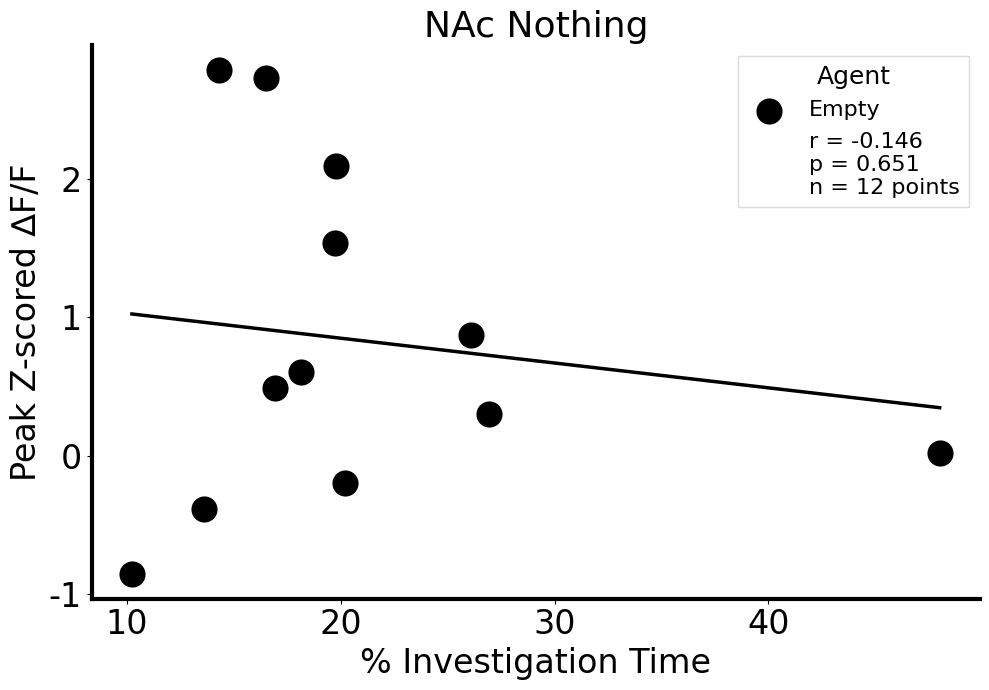

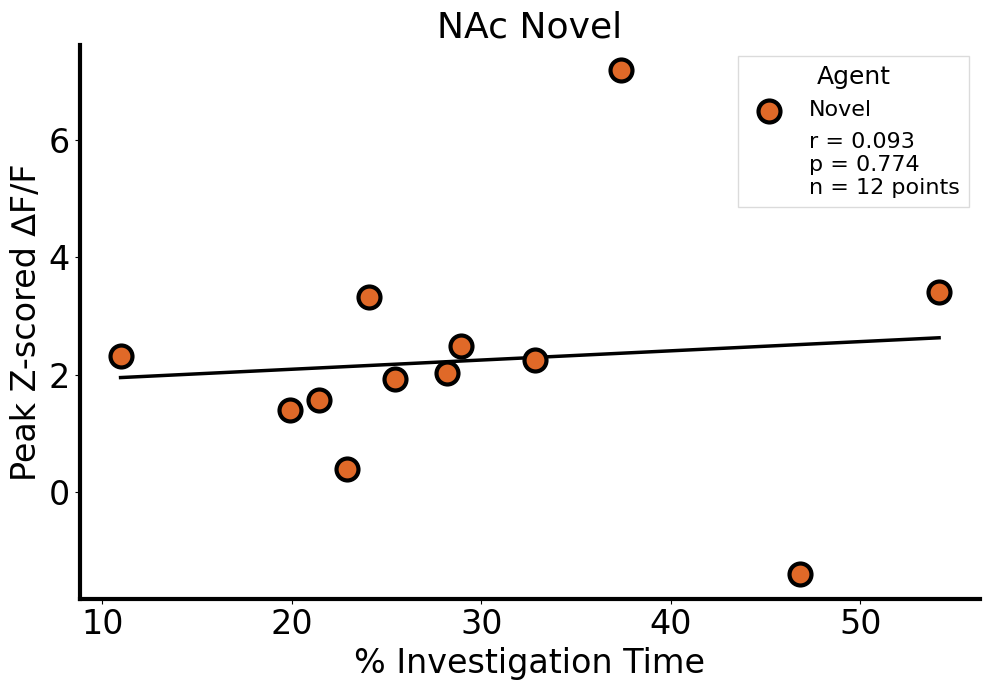

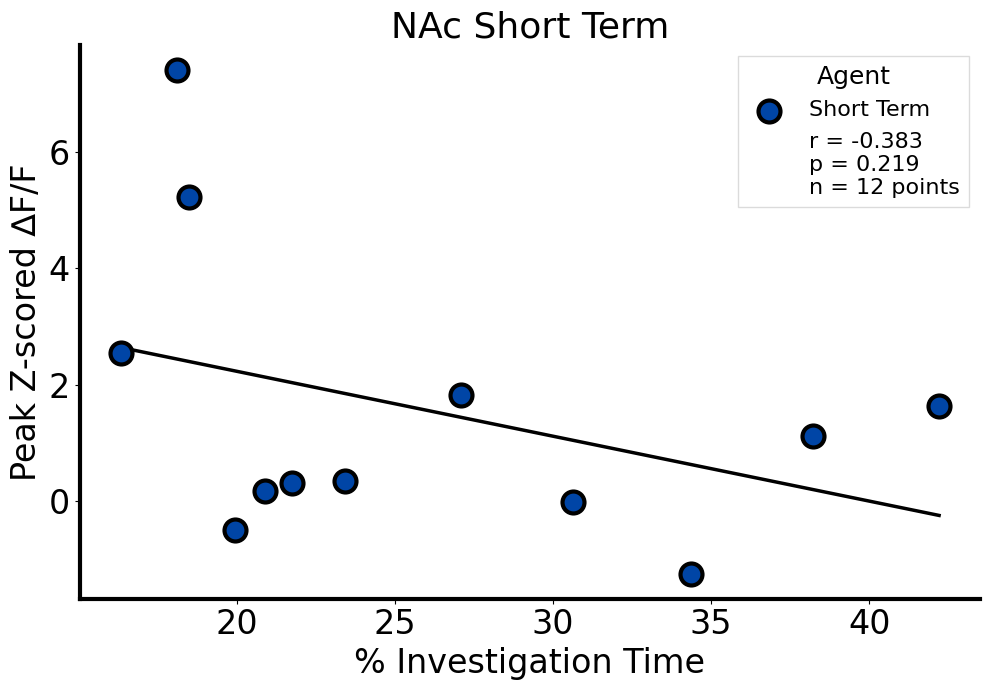

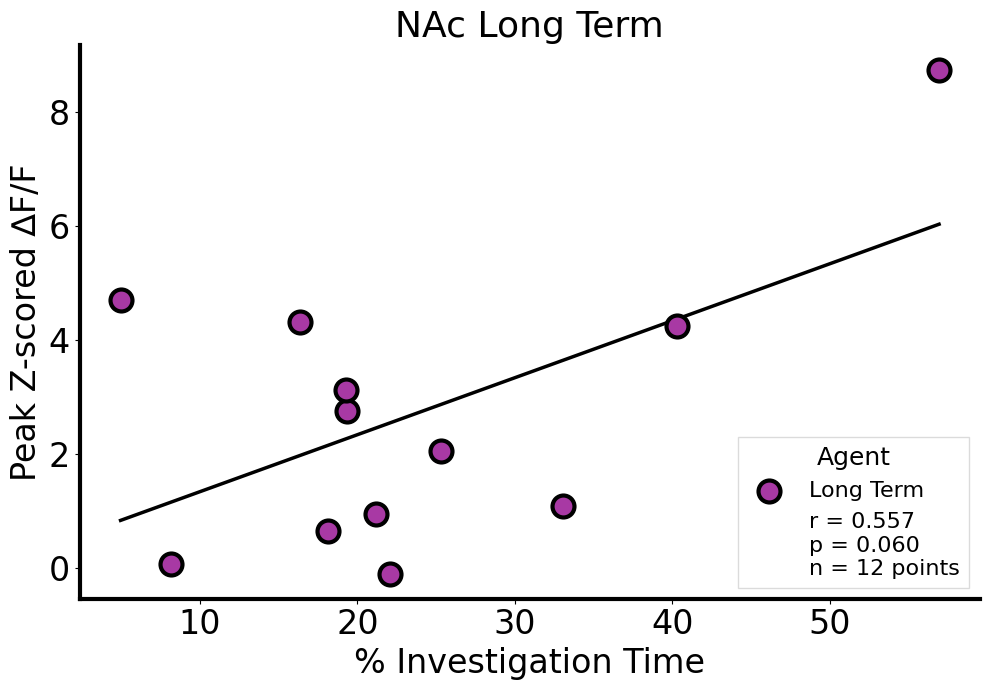

,Subject,Agent,Max Peak,Mean Z-score,AUC,PercentTime
0,n5-240826-083822,long_term,8.733262,3.946496,25.255295,0.569331
1,n6-240826-094701,long_term,0.643419,0.542092,0.758393,0.181580
2,n7-240827-072608,long_term,4.247811,0.750140,5.326890,0.402620
3,nn1-250117-081652,long_term,4.706376,1.290326,12.386868,0.049562
4,nn2-250117-085631,long_term,4.312919,2.358095,8.017709,0.163432
5,nn3-250118-090940,long_term,2.041743,0.583667,3.676257,0.253344
6,nn4-250118-094351,long_term,2.755954,0.556566,2.893342,0.193363
7,nn5-250117-093631,long_term,0.066535,-0.050004,-0.029847,0.081324
8,nn6-250117-101903,long_term,1.076860,0.877322,0.526269,0.330709
9,nn7-250118-101917,long_term,3.116293,0.948005,8.342387,0.193010


In [31]:
#custom_colors = ['black','#0045A6','#A839A4','#E06928'],
#custom_legend_labels=['Empty', 'Short Term', 'Long Term', 'Novel'],

plot_da_vs_percent_investigation_time_by_agent(
    dopamine_df=combined_df,  # your DA dataframe with 'Subject', 'Agent', DA metrics
    metadata_df=metadata_df,  # from your time analysis notebook
    agents_of_interest=["nothing"],
    agent_colors={"nothing": "black"},
    agent_labels={"novel": "Novel", "short_term": "Short Term", "long_term": "Long Term", "nothing": "Empty"},
    da_metric="Max Peak",
    use_first_only=True,
    title="NAc Nothing",
    ylabel="Peak Z-scored ∆F/F", 
    subjects_to_include=nac_list,
    legend_loc='upper right',
    save=False,
    save_name="da_vs_invest_time_corr.png"
)

plot_da_vs_percent_investigation_time_by_agent(
    dopamine_df=combined_df,  # your DA dataframe with 'Subject', 'Agent', DA metrics
    metadata_df=metadata_df,  # from your time analysis notebook
    agents_of_interest=["novel"],
    agent_colors={"novel": "#E06928"},
    agent_labels={"novel": "Novel"},
    da_metric="Max Peak",
    use_first_only=True,
    title="NAc Novel",
    ylabel="Peak Z-scored ∆F/F", 
    subjects_to_include=nac_list,
    legend_loc='upper right',
    save=False,
    save_name="da_vs_invest_time_corr.png"
)

plot_da_vs_percent_investigation_time_by_agent(
    dopamine_df=combined_df,  # your DA dataframe with 'Subject', 'Agent', DA metrics
    metadata_df=metadata_df,  # from your time analysis notebook
    agents_of_interest=["short_term"],
    agent_colors={"short_term": "#0045A6"},
    agent_labels={"short_term": "Short Term",},
    da_metric="Max Peak",
    use_first_only=True,
    title="NAc Short Term",
    ylabel="Peak Z-scored ∆F/F", 
    subjects_to_include=nac_list,
    legend_loc='upper right',
    save=False,
    save_name="da_vs_invest_time_corr.png"
)

plot_da_vs_percent_investigation_time_by_agent(
    dopamine_df=combined_df,  # your DA dataframe with 'Subject', 'Agent', DA metrics
    metadata_df=metadata_df,  # from your time analysis notebook
    agents_of_interest=["long_term"],
    agent_colors={"long_term": "#A839A4"},
    agent_labels={"long_term": "Long Term"},
    da_metric="Max Peak",
    use_first_only=True,
    title="NAc Long Term",
    ylabel="Peak Z-scored ∆F/F", 
    subjects_to_include=nac_list,
    legend_loc='lower right',
    save=False,
    save_name="da_vs_invest_time_corr.png"
)


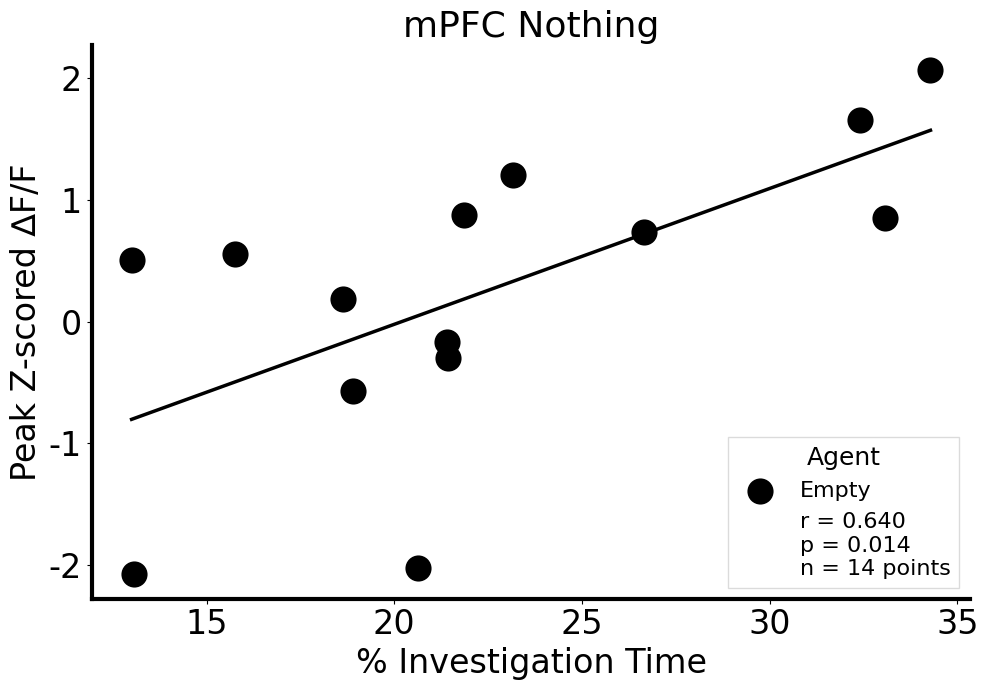

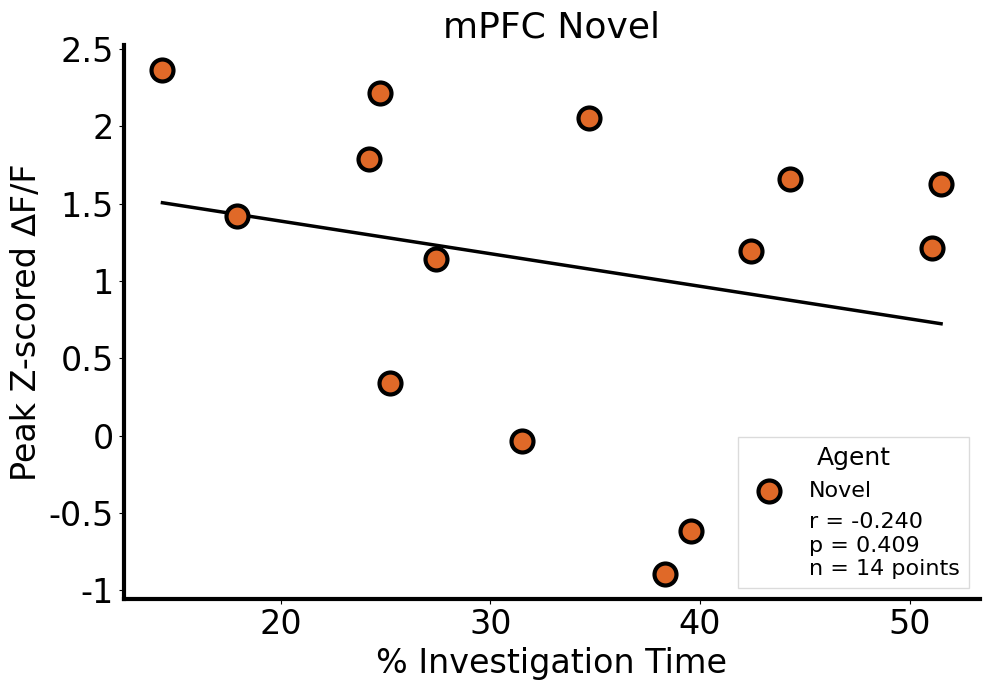

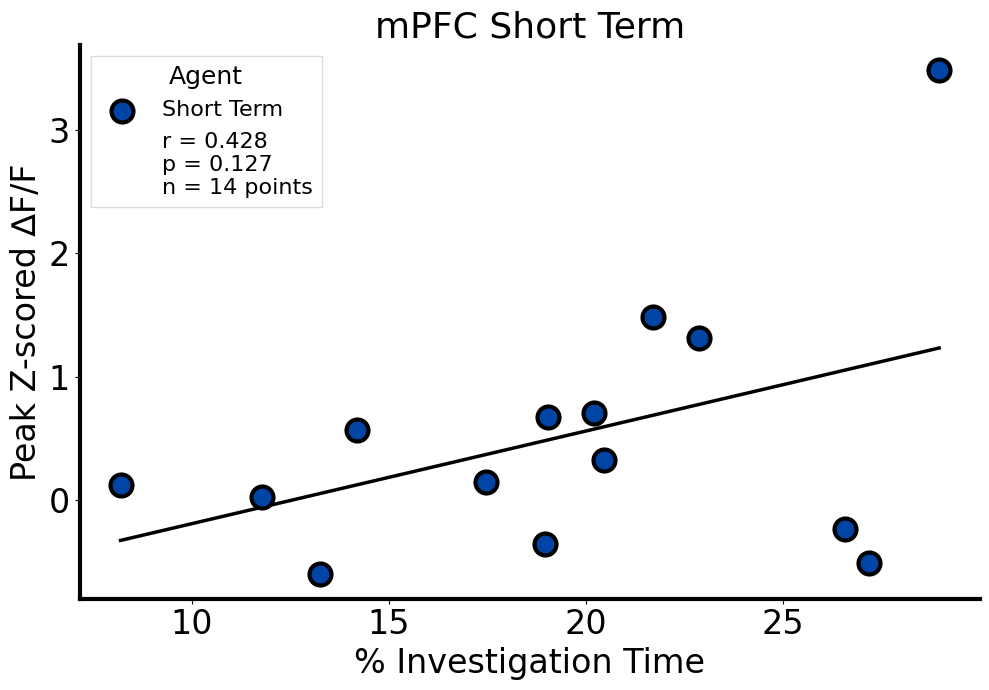

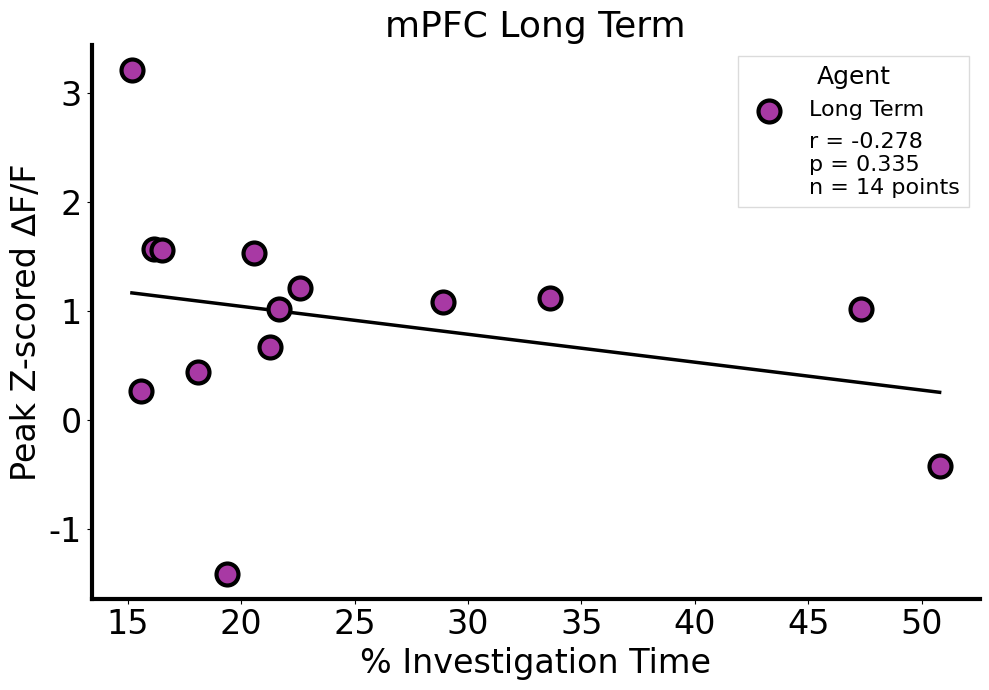

,Subject,Agent,Max Peak,Mean Z-score,AUC,PercentTime
0,p1-240522-080200,long_term,3.202811,2.578417,2.405241,0.151852
1,p2-240523-081105,long_term,-1.404736,-1.843238,-3.932339,0.193721
2,p3-240522-092431,long_term,0.440669,0.293577,0.293494,0.181142
3,p5-240826-091418,long_term,1.013938,-0.168078,-0.252105,0.473257
4,p6-240827-065303,long_term,1.533488,0.930796,2.138949,0.205769
5,p7-240826-102402,long_term,1.116516,0.012285,0.105050,0.336303
6,p8-240827-075823,long_term,1.567869,1.483442,1.185685,0.161459
7,pp1-250117-110456,long_term,1.018402,0.243914,0.780780,0.216578
8,pp2-250117-113909,long_term,0.669671,-0.687454,-8.936866,0.212923
9,pp3-250118-064713,long_term,-0.417628,-1.069876,-8.451711,0.507886


In [30]:
plot_da_vs_percent_investigation_time_by_agent(
    dopamine_df=combined_df,  # your DA dataframe with 'Subject', 'Agent', DA metrics
    metadata_df=metadata_df,  # from your time analysis notebook
    agents_of_interest=["nothing"],
    agent_colors={"nothing": "black"},
    agent_labels={"novel": "Novel", "short_term": "Short Term", "long_term": "Long Term", "nothing": "Empty"},
    da_metric="Max Peak",
    use_first_only=True,
    title="mPFC Nothing",
    ylabel="Peak Z-scored ∆F/F", 
    subjects_to_include=mpfc_list,
    legend_loc='lower right',
    save=False,
    save_name="da_vs_invest_time_corr.png"
)

plot_da_vs_percent_investigation_time_by_agent(
    dopamine_df=combined_df,  # your DA dataframe with 'Subject', 'Agent', DA metrics
    metadata_df=metadata_df,  # from your time analysis notebook
    agents_of_interest=["novel"],
    agent_colors={"novel": "#E06928"},
    agent_labels={"novel": "Novel"},
    da_metric="Max Peak",
    use_first_only=True,
    title="mPFC Novel",
    ylabel="Peak Z-scored ∆F/F", 
    subjects_to_include=mpfc_list,
    legend_loc='lower right',
    save=False,
    save_name="da_vs_invest_time_corr.png"
)

plot_da_vs_percent_investigation_time_by_agent(
    dopamine_df=combined_df,  # your DA dataframe with 'Subject', 'Agent', DA metrics
    metadata_df=metadata_df,  # from your time analysis notebook
    agents_of_interest=["short_term"],
    agent_colors={"short_term": "#0045A6"},
    agent_labels={"short_term": "Short Term",},
    da_metric="Max Peak",
    use_first_only=True,
    title="mPFC Short Term",
    ylabel="Peak Z-scored ∆F/F", 
    subjects_to_include=mpfc_list,
    legend_loc='upper left',
    save=False,
    save_name="da_vs_invest_time_corr.png"
)

plot_da_vs_percent_investigation_time_by_agent(
    dopamine_df=combined_df,  # your DA dataframe with 'Subject', 'Agent', DA metrics
    metadata_df=metadata_df,  # from your time analysis notebook
    agents_of_interest=["long_term"],
    agent_colors={"long_term": "#A839A4"},
    agent_labels={"long_term": "Long Term"},
    da_metric="Max Peak",
    use_first_only=True,
    title="mPFC Long Term",
    ylabel="Peak Z-scored ∆F/F", 
    subjects_to_include=mpfc_list,
    legend_loc='upper right',
    save=False,
    save_name="da_vs_invest_time_corr.png"
)


In [32]:
def plot_da_vs_percent_investigation_time_by_agent(
    dopamine_df,
    metadata_df,
    agents_of_interest,
    agent_colors,
    agent_labels,
    da_metric='Max Peak',
    use_first_only=True,
    subjects_to_include=None,
    pref_subjects=None,
    no_pref_subjects=None,
    title="DA vs % Investigation Time",
    ylabel=None,
    figsize=(10, 7),
    ylim=None,
    yticks_increment=None,
    legend_loc='upper left',
    pad_inches=0.1,
    save=False,
    save_name=None
):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    from scipy.stats import linregress

    # --- Prep subject IDs ---
    if "Subject" not in metadata_df.columns:
        metadata_df = metadata_df.reset_index()
    metadata_df["Subject"] = metadata_df["Subject"].astype(str).str.lower()
    dopamine_df["Subject"] = dopamine_df["Subject"].astype(str).str.lower()

    if subjects_to_include:
        subjects_to_include = [s.lower() for s in subjects_to_include]
        metadata_df = metadata_df[metadata_df["Subject"].isin(subjects_to_include)]
        dopamine_df = dopamine_df[dopamine_df["Subject"].isin(subjects_to_include)]

    if pref_subjects:
        pref_subjects = [s.lower() for s in pref_subjects]
    if no_pref_subjects:
        no_pref_subjects = [s.lower() for s in no_pref_subjects]

    # --- Corrected: Calculate percent investigation time for selected agents ---
    percent_records = []

    # Get all agent names from metadata by parsing columns like "Total_novel"
    all_agent_names = [
        col.replace("Total_", "") for col in metadata_df.columns if col.startswith("Total_")
    ]

    for _, row in metadata_df.iterrows():
        subj = row["Subject"]
        total_all = sum([row.get(f"Total_{agent}", 0) for agent in all_agent_names])
        if total_all == 0:
            continue

        for agent in agents_of_interest:
            agent_time = row.get(f"Total_{agent}", 0)
            percent = agent_time / total_all
            percent_records.append({
                "Subject": subj,
                "Agent": agent,
                "PercentTime": percent
            })

    percent_df = pd.DataFrame(percent_records)

    # --- Prepare DA values ---
    if use_first_only:
        dopamine_df = dopamine_df.groupby(["Subject", "Agent"], as_index=False).first()
    else:
        dopamine_df = dopamine_df.groupby(["Subject", "Agent"], as_index=False)[da_metric].mean()

    # --- Merge time + DA ---
    merged_df = pd.merge(dopamine_df, percent_df, on=["Subject", "Agent"], how="inner")

    if merged_df.empty:
        print("⚠️ No data to plot after merging.")
        return pd.DataFrame()

    # --- Plotting ---
    fig, ax = plt.subplots(figsize=figsize)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)

    all_x, all_y = [], []

    for agent in agents_of_interest:
        sub = merged_df[merged_df["Agent"] == agent]
        if sub.empty:
            continue

        for _, row in sub.iterrows():
            subj = row["Subject"]
            x = row["PercentTime"] * 100
            y = row[da_metric]
            all_x.append(x)
            all_y.append(y)

            if pref_subjects and subj in pref_subjects:
                color = "#A6C6FF"  # blue
            elif no_pref_subjects and subj in no_pref_subjects:
                color = "#D6C6F2"  # purple
            else:
                color = agent_colors.get(agent, 'gray')

            ax.scatter(x, y, color=color, s=250, alpha=1.0, edgecolor='black', linewidth=3, zorder=3)

    # --- Regression line ---
    stats_text_lines = ["r = ---", "p = ---", "n = ---"]
    if len(set(all_x)) > 1:
        slope, intercept, r_val, p_val, _ = linregress(all_x, all_y)
        x_fit = np.linspace(min(all_x), max(all_x), 100)
        y_fit = slope * x_fit + intercept
        ax.plot(x_fit, y_fit, color='black', linewidth=2.5, linestyle='-', zorder=2)

        stats_text_lines = [
            f"r = {r_val:.3f}",
            f"p = {p_val:.3f}",
            f"n = {len(all_x)} points"
        ]

    ax.set_xlabel("% Investigation Time", fontsize=24)
    ax.set_ylabel(ylabel if ylabel else da_metric, fontsize=24)
    ax.set_title(title, fontsize=26)
    ax.tick_params(axis='both', labelsize=24)

    if ylim:
        ax.set_ylim(ylim)
    if yticks_increment:
        y_min, y_max = ax.get_ylim()
        yticks = np.arange(np.floor(y_min), np.ceil(y_max) + yticks_increment, yticks_increment)
        ax.set_yticks(yticks)

    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}' if x.is_integer() else f'{x:.1f}'))

    # --- Legend ---
    handles, labels = ax.get_legend_handles_labels()
    stats_handle = plt.Line2D([], [], color='none', label="\n".join(stats_text_lines))
    handles.append(stats_handle)
    labels.append("\n".join(stats_text_lines))

    legend = ax.legend(handles=handles, labels=labels, loc=legend_loc, fontsize=16, title='Agent', title_fontsize=18,
                       frameon=True, facecolor='white', edgecolor='lightgray', fancybox=False)
    legend.get_frame().set_alpha(0.8)

    plt.tight_layout()
    if save:
        if save_name is None:
            raise ValueError("save_name must be provided if save is True.")
        plt.savefig(save_name, transparent=True, bbox_inches='tight', pad_inches=pad_inches)

    plt.show()

    return merged_df

In [ ]:
experiment.reset_all_behaviors()
experiment.group_extract_manual_annotations(bout_definitions,first_only=False)

In [ ]:
def prep_combined_da_metrics(
    experiment,
    sniff_cup_csv_path,
    metric_list=None,
    first_only=False,
    per_event=False  # NEW PARAM
):
    import pandas as pd
    import re

    # Normalize behavior label spacing
    def normalize_behavior_label(label):
        return re.sub(r'\s+', ' ', label.strip().lower().replace('\u00a0', ' '))

    assign_df = pd.read_csv(sniff_cup_csv_path)
    assign_df['Subject'] = assign_df['Subject'].astype(str).str.lower()

    # Build subject -> behavior name -> agent identity mapping
    subject_to_behavior_to_agent = {}
    for _, row in assign_df.iterrows():
        subj = row['Subject']
        subject_to_behavior_to_agent[subj] = {}
        for col in row.index:
            col_norm = normalize_behavior_label(str(col))
            if col_norm.startswith("sniff cup"):
                agent_label = normalize_behavior_label(str(row[col]))
                subject_to_behavior_to_agent[subj][col_norm] = agent_label

    all_rows = []

    for trial_name, trial in experiment.trials.items():
        if not hasattr(trial, 'behaviors') or trial.behaviors.empty:
            continue

        df = trial.behaviors.copy()
        df['Behavior'] = df['Behavior'].astype(str).apply(normalize_behavior_label)

        subject_id = trial_name.lower()

        if subject_id not in subject_to_behavior_to_agent:
            continue

        mapping = subject_to_behavior_to_agent[subject_id]

        # Keep only sniff cup behaviors
        df = df[df["Behavior"].str.startswith("sniff cup")]

        # Map behaviors to agents
        df["Agent"] = df["Behavior"].apply(lambda b: mapping.get(b))
        df["Subject"] = subject_id
        df["Trial"] = trial_name

        unmatched = df[df["Agent"].isna()]
        if not unmatched.empty:
            print(f"‼️ Unmatched behaviors for subject '{subject_id}':")
            print("Behaviors that failed to map:", unmatched["Behavior"].unique())
            print("Available mapping keys:", list(mapping.keys()))

        df = df.dropna(subset=["Agent"])

        # Choose metrics
        known_cols = ["Behavior", "Agent", "Subject", "Trial"]
        if metric_list:
            metric_cols = [m for m in metric_list if m in df.columns]
        else:
            metric_cols = [c for c in df.columns if c not in known_cols and pd.api.types.is_numeric_dtype(df[c])]

        if not metric_cols:
            continue

        df = df[["Subject", "Agent", "Trial"] + metric_cols]

        if first_only:
            df = df.groupby(["Subject", "Agent"], as_index=False).first()

        all_rows.append(df)

    if not all_rows:
        print("⚠️ No rows added to DataFrame. Check if behavior labels match and mapping keys are clean.")
        print(f"Subjects in experiment: {list(experiment.trials.keys())}")
        print(f"Subjects in assignments file: {assign_df['Subject'].tolist()}")
        print("Sample mapping dictionary:")
        for subj, mapping in subject_to_behavior_to_agent.items():
            print(f"{subj} -> {mapping}")
        return pd.DataFrame()

    combined_df = pd.concat(all_rows, ignore_index=True)

    if per_event:
        print(f"✅ Final per-event DataFrame created with {len(combined_df)} rows from {combined_df['Subject'].nunique()} subjects.")
        return combined_df

    # --- Aggregate by Subject-Agent pair ---
    if first_only:
        grouped = combined_df  # already first event per Subject-Agent
    else:
        grouped = combined_df.groupby(["Subject", "Agent"], as_index=False)[metric_cols].mean()

    # --- Ensure each subject has all 4 agent rows ---
    all_agents = ['nothing', 'short_term', 'long_term', 'novel']
    all_subjects = sorted(grouped['Subject'].unique())
    full_index = pd.MultiIndex.from_product([all_subjects, all_agents], names=['Subject', 'Agent'])

    final_df = (
        grouped.set_index(['Subject', 'Agent'])
               .reindex(full_index)
               .fillna(0)
               .reset_index()
    )

    print(f"✅ Final DA metrics DataFrame created with {len(final_df)} rows from {len(all_subjects)} subjects.")
    return final_df

sub_df = prep_combined_da_metrics(
    experiment=experiment,
    sniff_cup_csv_path=cups,
    metric_list=["Max Peak", "Mean Z-score", "AUC"],
    per_event=True
)

sub_df

In [ ]:
def plot_peak_by_agent_from_df(
    df,
    sniff_cup_csv_path=None,              # optional now if Agent column is already present
    selected_agents=None,                # e.g. ['novel', 'short_term']
    n_subsequent_investigations=3,
    peak_col="Max Peak",
    metric_type='slope',
    figsize=(14, 8),
    line_order=None,
    custom_colors=None,
    custom_legend_labels=None,
    custom_xtick_labels=None,
    ylim=None,
    ytick_increment=None,
    xlabel="Investigation Index",
    ylabel="Avg Max Peak",
    plot_title="Average Peak per Agent"
):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.stats import linregress
    from scipy.optimize import curve_fit

    def exponential_decay(x, A, B, tau):
        return A + B * np.exp(-x / tau)

    def normalize_label(label):
        import re
        return re.sub(r'\s+', ' ', str(label).strip().lower().replace('\u00a0', ' '))

    def create_mapping(sniff_cup_csv_path):
        assign_df = pd.read_csv(sniff_cup_csv_path)
        assign_df['Subject'] = assign_df['Subject'].astype(str).str.lower()
        subject_to_behavior_to_agent = {}
        for _, row in assign_df.iterrows():
            subj = row['Subject']
            subject_to_behavior_to_agent[subj] = {}
            for col in row.index:
                col_norm = normalize_label(col)
                if col_norm.startswith("sniff cup"):
                    agent_label = normalize_label(row[col])
                    subject_to_behavior_to_agent[subj][col_norm] = agent_label
        return subject_to_behavior_to_agent

    df = df.copy()

    # --- Optional agent mapping ---
    if "Agent" not in df.columns:
        if sniff_cup_csv_path is None:
            raise ValueError("You must provide either an 'Agent' column or a sniff_cup_csv_path.")

        mapping = create_mapping(sniff_cup_csv_path)

        def get_agent(row):
            subj = str(row['Subject']).lower()
            bout = str(row['Bout']).lower()
            if '-' not in bout:
                return None
            cup_number = bout.split('-')[1]
            behavior = f"sniff cup {cup_number}"
            return mapping.get(subj, {}).get(behavior)

        df['Agent'] = df.apply(get_agent, axis=1)

    # --- Filter agents ---
    if selected_agents:
        df = df[df['Agent'].isin(selected_agents)]

    # --- Investigation indexing ---
    df.sort_values(["Subject", "Agent", "Event_Start"], inplace=True)
    df["InvestigationIndex"] = df.groupby(["Subject", "Agent"]).cumcount() + 1
    df = df[df["InvestigationIndex"] <= n_subsequent_investigations]

    # --- Aggregate ---
    agg_df = (
        df.groupby(["Agent", "InvestigationIndex"], as_index=False)
        .agg(
            SubjectCount=("Subject", "nunique"),
            AvgPeak=(peak_col, "mean")
        )
    )

    # --- Plotting ---
    if custom_colors is None:
        custom_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

    fig, ax = plt.subplots(figsize=figsize)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_linewidth(5)
    ax.spines["bottom"].set_linewidth(5)
    ax.tick_params(axis="both", which="major", labelsize=48)

    metrics_dict = {}
    unique_agents = line_order if line_order else sorted(agg_df["Agent"].dropna().unique())

    for i, agent in enumerate(unique_agents):
        df_line = agg_df[agg_df["Agent"] == agent].copy()
        df_line.sort_values("InvestigationIndex", inplace=True)

        x_vals = df_line["InvestigationIndex"].values
        y_vals = df_line["AvgPeak"].values

        if len(x_vals) == 0 or len(y_vals) == 0:
            print(f"Skipping agent '{agent}' due to no data.")
            continue

        if metric_type.lower() == 'slope':
            slope, _, _, _, _ = linregress(x_vals, y_vals)
            metrics_dict[agent] = slope
            metric_label = f"slope: {slope:.3f}"
        elif metric_type.lower() == 'decay':
            try:
                p0 = (np.min(y_vals), np.max(y_vals)-np.min(y_vals), 1.0)
                popt, _ = curve_fit(exponential_decay, x_vals, y_vals, p0=p0)
                tau = popt[2]
                metrics_dict[agent] = tau
                metric_label = f"decay: {tau:.3f}"
            except RuntimeError:
                metrics_dict[agent] = np.nan
                metric_label = "decay: N/A"
        else:
            raise ValueError("metric_type must be 'slope' or 'decay'.")

        legend_label = custom_legend_labels[i] if custom_legend_labels and i < len(custom_legend_labels) else agent
        legend_label += f" ({metric_label}, n={df_line['SubjectCount'].max()})"

        color = custom_colors[i % len(custom_colors)]
        ax.plot(
            x_vals, y_vals,
            marker='o', linestyle='-',
            color=color,
            linewidth=5, markersize=30,
            label=legend_label
        )

    ax.set_xlabel(xlabel, fontsize=44, labelpad=12)
    ax.set_ylabel(ylabel, fontsize=44, labelpad=12)

    if ylim is not None:
        ax.set_ylim(ylim)
        if ytick_increment is not None:
            ticks = np.arange(ylim[0], ylim[1] + ytick_increment, ytick_increment)
            ax.set_yticks(ticks)
            ax.set_yticklabels([f"{t:.0f}" if t.is_integer() else f"{t:.1f}" for t in ticks], fontsize=44)

    if custom_xtick_labels:
        ax.set_xticks(np.arange(1, len(custom_xtick_labels) + 1))
        ax.set_xticklabels(custom_xtick_labels, fontsize=44)
    else:
        x_vals = sorted(agg_df["InvestigationIndex"].unique())
        ax.set_xticks(x_vals)
        ax.set_xticklabels([str(x) for x in x_vals], fontsize=44)

    if plot_title:
        ax.set_title(plot_title, fontsize=24)

    ax.legend(fontsize=26)
    plt.tight_layout()
    plt.show()

    print(f"\n=== Computed Metric ({metric_type.upper()}): ===")
    for agent, val in metrics_dict.items():
        print(f"Agent: {agent}, {metric_type} = {val:.3f}")

    return agg_df



In [ ]:
plot_peak_by_agent_from_df(
    df=sub_df,
    sniff_cup_csv_path=cups,
    selected_agents=["nothing","novel", "long_term", "short_term"],
    peak_col="Max Peak",
    metric_type="slope"
)